# Logistic Regression exercise

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [2]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]

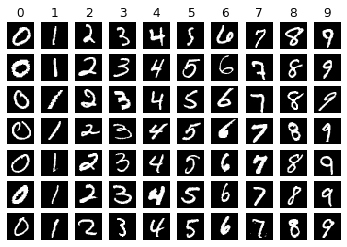

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(10)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Binary classification
We use the Logistic Regression to classification handwritten digits wheather it's zero or not. If the handwritten digits is '0' , then the label is 0, otherwise, the label is 1.

In [4]:
# transform the labels to binary
for i in range(len(labels)):
    if labels[i] != 0:
        labels[i] = 1
        
# 2/3 training set
# 1/3 test set
split_index = int(len(labels) * 2 / 3)
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

In [5]:
X_train_feats = X_train
X_test_feats = X_test

#X_train_feats = (X_train - np.mean(X_train)) / np.std(X_train) # choose and extract features
#X_test_feats = (X_test - np.mean(X_test)) / np.std(X_test) # choose and extract features
print(X_train_feats.shape)
print(X_test_feats.shape)

(28000, 785)
(14000, 785)


In [6]:
#print(X_train_feats[0])

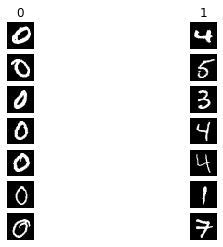

In [7]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(2)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [11]:
from DSVC.classifiers import LogisticRegression

# Start training. 
# You should open DSVC/classifiers/logistic_regression.py and implement the function.
# Then run this cell.

classifier = LogisticRegression()
loss_history = classifier.train(
    X_train_feats, 
    y_train,
    learning_rate = 1e-5,
    num_iters = 100,
    batch_size = 64,
)

iteration 0 / 100: loss 0.890649
iteration 10 / 100: loss 0.099859
iteration 20 / 100: loss 0.105298
iteration 30 / 100: loss 0.083537
iteration 40 / 100: loss 0.063043
iteration 50 / 100: loss 0.046715
iteration 60 / 100: loss 0.138140
iteration 70 / 100: loss 0.025092
iteration 80 / 100: loss 0.033077
iteration 90 / 100: loss 0.049593


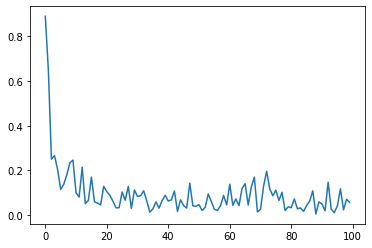

In [12]:
plt.plot(loss_history)

In [13]:
y_test_pred = classifier.predict(X_test_feats)
print(y_test.shape)
print(X_test_feats.shape)
print("The accuracy socre is ", np.mean(y_test == y_test_pred))

(14000,)
(14000, 785)
The accuracy socre is  0.9852142857142857


you should get the accuracy higher than 96%.

----

### F1-Measure
Notice that, if our model always output '1', totally ignoring the input X, we can get a accuracy 90%.So, in this assignment, accuracy is not efficient enough. 

We will use F1-Measure to evaluate our model.

You may need this:
[F1-Measure](https://baike.baidu.com/item/f-measure/913107?fr=aladdin)

In [14]:
# Calculate the precision(准确率), recall(召回率) and F1
# important： We should consider label '0' as 'positive' here. 
# That means 'True positive' ==> '(y_test == 0) and (y_test_pred == 0)'

#######Your code here########
TP = 0
FP = 0
FN = 0
TN = 0
for i in range(y_test.shape[0]):
    if y_test[i] == 0 and y_test_pred[i] == 0:
        TP += 1
    
    if y_test[i] == 1 and y_test_pred[i] == 0:
        FP += 1
        
    if y_test[i] == 0 and y_test_pred[i] == 1:
        FN += 1
        
    if y_test[i] == 1 and y_test_pred[i] == 1:
        TN += 1
        
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(precision)
print(recall)
print('F1:', precision*recall*2/(precision+recall))

0.9588414634146342
0.891566265060241
F1: 0.9239809034153508


you should get the F1 higher than 85%.

# Multiclass classification

Now, we use the Logistic Regression to classification handwritten digits. There are 10 class, from '0' to '9'.


Hint: The method "one vs all" may helpful. [Here is the introduction to "one vs all"](https://msdn.microsoft.com/library/en-us/Dn905887.aspx). 

In [17]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
        
# 2/3 training set
# 1/3 test set
split_index = int(len(labels) * 2 / 3)
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print(X_train.shape)
print(X_test.shape)

(28000, 785)
(14000, 785)


In [18]:
X_train_feats = (X_train - np.mean(X_train)) / np.std(X_train) # choose and extract features
X_test_feats = (X_test - np.mean(X_test)) / np.std(X_test) # choose and extract features

In [30]:
# Start training. 
# You should update your code in DSVC/classifiers/logistic_regression.py .
# Then run this cell.
from DSVC.classifiers import LogisticRegression
classifier = LogisticRegression()
loss_history = classifier.one_vs_all(
    X_train_feats, 
    y_train,
    learning_rate = 1e-2,
    num_iters = 500,
    batch_size = 64,
)

iteration 0 / 500: loss 0.701391
iteration 10 / 500: loss 0.191509
iteration 20 / 500: loss 0.125444
iteration 30 / 500: loss 0.140123
iteration 40 / 500: loss 0.087471
iteration 50 / 500: loss 0.111237
iteration 60 / 500: loss 0.139231
iteration 70 / 500: loss 0.069709
iteration 80 / 500: loss 0.059383
iteration 90 / 500: loss 0.078036
iteration 100 / 500: loss 0.064285
iteration 110 / 500: loss 0.073464
iteration 120 / 500: loss 0.046529
iteration 130 / 500: loss 0.085960
iteration 140 / 500: loss 0.073837
iteration 150 / 500: loss 0.033963
iteration 160 / 500: loss 0.068045
iteration 170 / 500: loss 0.219670
iteration 180 / 500: loss 0.097024
iteration 190 / 500: loss 0.061293
iteration 200 / 500: loss 0.046948
iteration 210 / 500: loss 0.052308
iteration 220 / 500: loss 0.041326
iteration 230 / 500: loss 0.120276
iteration 240 / 500: loss 0.051574
iteration 250 / 500: loss 0.034177
iteration 260 / 500: loss 0.046139
iteration 270 / 500: loss 0.036820
iteration 280 / 500: loss 0.037

iteration 430 / 500: loss 0.093898
iteration 440 / 500: loss 0.187422
iteration 450 / 500: loss 0.075918
iteration 460 / 500: loss 0.046983
iteration 470 / 500: loss 0.096112
iteration 480 / 500: loss 0.056425
iteration 490 / 500: loss 0.179626
-----------------------
iteration 0 / 500: loss 0.706243
iteration 10 / 500: loss 0.357270
iteration 20 / 500: loss 0.583741
iteration 30 / 500: loss 0.260252
iteration 40 / 500: loss 0.290524
iteration 50 / 500: loss 0.354023
iteration 60 / 500: loss 0.247742
iteration 70 / 500: loss 0.287803
iteration 80 / 500: loss 0.180838
iteration 90 / 500: loss 0.091098
iteration 100 / 500: loss 0.198374
iteration 110 / 500: loss 0.166601
iteration 120 / 500: loss 0.289695
iteration 130 / 500: loss 0.169712
iteration 140 / 500: loss 0.211119
iteration 150 / 500: loss 0.169103
iteration 160 / 500: loss 0.110837
iteration 170 / 500: loss 0.120392
iteration 180 / 500: loss 0.212133
iteration 190 / 500: loss 0.118469
iteration 200 / 500: loss 0.163114
iterati

iteration 260 / 500: loss 0.142465
iteration 270 / 500: loss 0.152788
iteration 280 / 500: loss 0.116367
iteration 290 / 500: loss 0.210240
iteration 300 / 500: loss 0.101076
iteration 310 / 500: loss 0.102725
iteration 320 / 500: loss 0.135234
iteration 330 / 500: loss 0.090158
iteration 340 / 500: loss 0.121551
iteration 350 / 500: loss 0.164591
iteration 360 / 500: loss 0.084281
iteration 370 / 500: loss 0.086823
iteration 380 / 500: loss 0.123231
iteration 390 / 500: loss 0.132751
iteration 400 / 500: loss 0.071820
iteration 410 / 500: loss 0.181609
iteration 420 / 500: loss 0.057971
iteration 430 / 500: loss 0.240154
iteration 440 / 500: loss 0.067491
iteration 450 / 500: loss 0.099418
iteration 460 / 500: loss 0.050312
iteration 470 / 500: loss 0.172140
iteration 480 / 500: loss 0.099602
iteration 490 / 500: loss 0.120849
-----------------------


In [31]:
# you may change your code in function `predict`
y_test_pred = classifier.one_vs_all_predict(X_test_feats)
print("The accruacy socre is ", np.mean(y_test == y_test_pred))

The accruacy socre is  0.8809285714285714
